# Competition effect

In that part, we will try to understand the effect of competition on movies. We will try to answer the following question: "Does the competition can make a movie become a box office bomb ?". To do so, we will follow the following steps:

1. Extract this features: 
    - The number of movies released in the same week
    - The number of movies released in the same month
    - The number of movies released in the same year
    - The number of movies released in the same week in the same country
    - The number of movies released in the same month in the same country
    - The number of movies released in the same year in the same country
    - The number of movies released in the same week in the same genre
    - The number of movies released in the same month in the same genre
    - The number of movies released in the same year in the same genre
    - The director's avereage previous box office revenue
    - The director's number of previous movies
2. Train a linear regression model to predict the appartenant of a movie to a box office bomb or not using the features extracted in the previous step

   As control features, we will use the following features:
    - The rating of the movie
    - The budget of the movie
    - The runtime
    - The language of the movie
    - The country of the movie

3. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.manifold import TSNE
from helpers import *
from IPython.display import display


In [2]:
movies_df = get_movies()
movies_df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop NA values in the release date column
movies_df.dropna(subset=["release_date"], inplace=True)

# Convert release_date to datetime
get_bombs_title()
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")

# Get the box office bombs from tvtropes.org
movies_df["is_bomb_tvtropes"] = movies_df["name"].isin(get_bombs_title())

# Get the genres as an extra dataframe
"""
genres_df = movies_df[["wiki_id", "genres"]]
genres_df["genres"] = genres_df["genres"].apply(lambda x: list(map(lambda y: y["name"], json.loads(x.replace("'", '"')))))
genres_df = genres_df.explode("genres")
genres_df.rename(columns={"genres": "genre"}, inplace=True)

genres_exploded_df = movies_df.merge(genres_df, on="id", how="inner")
"""

# Get the plot as an extra dataframe
plots_df = get_plot_summaries()
plots_df = plots_df.merge(movies_df[["wiki_id", "name", "is_bomb_tvtropes"]], on="wiki_id", how="inner")

# display(genres_df.head())
display(movies_df.head())
print(movies_df.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'data/MovieSummaries/movie.metadata.csv'

In [3]:
# Load the data
imdb_movies_df = get_imdb_movies()
imdb_movies_df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop NA values in the release date column
imdb_movies_df.dropna(subset=["release_date"], inplace=True)

# Convert release_date to datetime
imdb_movies_df["release_date"] = pd.to_datetime(imdb_movies_df["release_date"], errors="coerce")

# Get the box office bombs from tvtropes.org
imdb_movies_df["is_bomb_tvtropes"] = imdb_movies_df["title"].isin(get_bombs_title())
# Get the box office bombs as negative profit
imdb_movies_df["is_bomb_profit"] = imdb_movies_df["adj_profit"] < 0

# Get the genres as an extra dataframe
imdb_genres_df = imdb_movies_df[["id", "genres"]]
imdb_genres_df["genres"] = imdb_genres_df["genres"].apply(lambda x: list(map(lambda y: y["name"], json.loads(x.replace("'", '"')))))
imdb_genres_df = imdb_genres_df.explode("genres")
imdb_genres_df.rename(columns={"genres": "genre"}, inplace=True)

imdb_genres_exploded_df = imdb_movies_df.merge(imdb_genres_df, on="id", how="inner")

display(imdb_movies_df.head())
print(imdb_movies_df.columns)
display(imdb_genres_df.head())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  
/workspaces/Project/src/helpers.py:79: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 79 of the file /workspaces/Project/src/helpers.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,year,adj_revenue,adj_budget,adj_profit,is_bomb_tvtropes,is_bomb_profit
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1995.0,6.641859e+08,5.334055e+07,6.108454e+08,False,False
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,1995.0,4.672583e+08,1.155712e+08,3.516871e+08,False,False
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,1995.0,0.000000e+00,0.000000e+00,0.000000e+00,False,False
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,1995.0,1.448234e+08,2.844829e+07,1.163751e+08,False,False
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,1995.0,1.361587e+08,0.000000e+00,1.361587e+08,False,False


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'year', 'adj_revenue', 'adj_budget',
       'adj_profit', 'is_bomb_tvtropes', 'is_bomb_profit'],
      dtype='object')


,id,genre
0,862,Animation
0,862,Comedy
0,862,Family
1,8844,Adventure
1,8844,Fantasy


## Exctract features

In [4]:
# Count the number of movies per week, month, year
for period in ["W", "M", "Y"]:
    imdb_movies_df["period"] = imdb_movies_df["release_date"].apply(lambda x: x.to_period(period))
    imdb_movies_df["num_release_this_" + period] = imdb_movies_df.groupby("period")["period"].transform("count")
imdb_movies_df.drop(columns=["period"], inplace=True)

# Count the number of movies per week, month, year of the same genre
for period in ["W", "M", "Y"]:
    imdb_movies_df["num_release_this_" + period + "_of_this_genre"] = 0
    imdb_movies_df["period"] = imdb_movies_df["release_date"].apply(lambda x: x.to_period(period))
    imdb_genres_exploded_df["period"] = imdb_genres_exploded_df["release_date"].apply(lambda x: x.to_period(period))
    for genre in imdb_genres_df["genre"].unique():
        # imdb_genres_df["num_release_this_" + period + "_of_this_genre"] = merge_df[merge_df["genres"] == genre].groupby("period")["period"].transform("count")
        counts = imdb_genres_exploded_df[imdb_genres_exploded_df["genre"] == genre].groupby("period")["id"].nunique()
        imdb_movies_df["num_release_this_" + period + "_of_this_genre"] = imdb_movies_df["period"].apply(lambda x: counts[x] if x in counts else 0)

imdb_movies_df.drop(columns=["period"], inplace=True)
imdb_genres_exploded_df.drop(columns=["period"], inplace=True)


## Linear regression

In [5]:
# test_features = ["num_release_this_W", "num_release_this_M", "num_release_this_Y", "num_release_this_W_of_this_genre", "num_release_this_M_of_this_genre", "num_release_this_Y_of_this_genre"]
test_features = ["num_release_this_W_of_this_genre",  "num_release_this_Y_of_this_genre"]
control_features = ["adj_budget", "runtime", "popularity", "vote_average", "vote_count", "num_release_this_W", "num_release_this_Y"]
target_features = ["is_bomb_tvtropes", "is_bomb_profit"]

# Get the features
x = imdb_movies_df[test_features + control_features + target_features]
x.dropna(inplace=True)

y_tvtropes = x["is_bomb_tvtropes"]
y_profit = x["is_bomb_profit"]
x = x[test_features + control_features].astype(np.float32)
for f in x.columns:
    x[f] = (x[f] - x[f].min()) / (x[f].max() - x[f].min())

# Cast to float32
x = x.astype(np.float32)
y_tvtropes = y_tvtropes.astype(np.float32)
y_profit = y_profit.astype(np.float32)

# Fit the model
sm.add_constant(x)
print(len(x))


44935


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
model = sm.OLS(y_tvtropes, x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       is_bomb_tvtropes   R-squared (uncentered):                   0.054
Model:                            OLS   Adj. R-squared (uncentered):              0.054
Method:                 Least Squares   F-statistic:                              287.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:22:41   Log-Likelihood:                          21326.
No. Observations:               44935   AIC:                                 -4.263e+04
Df Residuals:                   44926   BIC:                                 -4.256e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
num_release_this_W_of_this_genre    -0.0062      0.006     -1.015      0.310      -0.018       0.006
num_release_this_Y_of_this_genre     0.0046      0.006      0.758      0.449      -0.007       0.016
adj_budget                           1.5695      0.051     31.027      0.000       1.470       1.669
runtime                              0.1780      0.021      8.625      0.000       0.138       0.218
popularity                           1.0342      0.079     13.100      0.000       0.879       1.189
vote_average                         0.0086      0.003      2.905      0.004       0.003       0.014
vote_count                          -0.4771      0.028    -17.009      0.000      -0.532      -0.422
num_release_this_W                  -0.0055      0.006     -0.880      0.379      -0.018       0.007
num_release_this_Y                  -0.0085      0.005     -1.654      0.098      -0.019       0.002
==============================================================================
Omnibus:                    49114.872   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2575100.535
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      38.166   Cond. No.                         99.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model = sm.OLS(y_profit, x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         is_bomb_profit   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.186
Method:                 Least Squares   F-statistic:                              1139.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:22:41   Log-Likelihood:                         -10235.
No. Observations:               44935   AIC:                                  2.049e+04
Df Residuals:                   44926   BIC:                                  2.057e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
num_release_this_W_of_this_genre    -0.0315      0.012     -2.565      0.010      -0.056      -0.007
num_release_this_Y_of_this_genre    -0.0874      0.012     -7.150      0.000      -0.111      -0.063
adj_budget                           5.0017      0.102     48.985      0.000       4.802       5.202
runtime                              0.3914      0.042      9.398      0.000       0.310       0.473
popularity                           3.2775      0.159     20.568      0.000       2.965       3.590
vote_average                         0.0036      0.006      0.610      0.542      -0.008       0.015
vote_count                          -2.2949      0.057    -40.536      0.000      -2.406      -2.184
num_release_this_W                  -0.0207      0.013     -1.622      0.105      -0.046       0.004
num_release_this_Y                   0.1876      0.010     18.119      0.000       0.167       0.208
==============================================================================
Omnibus:                    18453.050   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73011.944
Skew:                           2.072   Prob(JB):                         0.00
Kurtosis:                       7.672   Cond. No.                         99.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot embeddings

### Compute the embeddings

In [25]:
with open("../data/MovieSummaries/plots_embeddings.pkl", "rb") as f:
    plot_embeddings_mapping = pickle.load(f)


### All genres

In [26]:
# Get a 2D representation of the plot embeddings
pca = PCA(n_components=2)
keys = list(plot_embeddings_mapping.keys())
fitted_repr = pca.fit_transform(list(plot_embeddings_mapping.values()))
# print("Explained variance ratio", sum(pca.explained_variance_ratio_))

plot_embeddings_mapping_x = {}
plot_embeddings_mapping_y = {}
for key, e in zip(keys, fitted_repr):
    plot_embeddings_mapping_x[key] = e[0]
    plot_embeddings_mapping_y[key] = e[1]

plots_df["x"] = plots_df["wiki_id"].apply(lambda x: plot_embeddings_mapping_x[x] if x in plot_embeddings_mapping_x else 0)
plots_df["y"] = plots_df["wiki_id"].apply(lambda x: plot_embeddings_mapping_y[x] if x in plot_embeddings_mapping_y else 0)


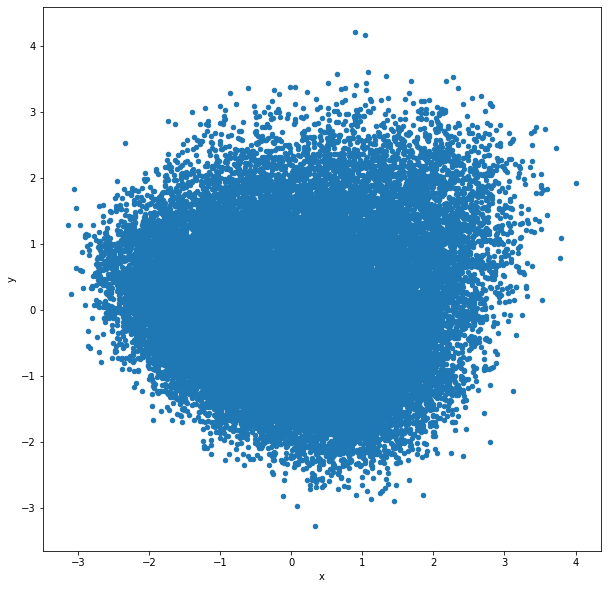

In [27]:
# Plot the 2D representation of the plot embeddings
plots_df.plot.scatter(x="x", y="y", figsize=(10, 10))
plt.show()

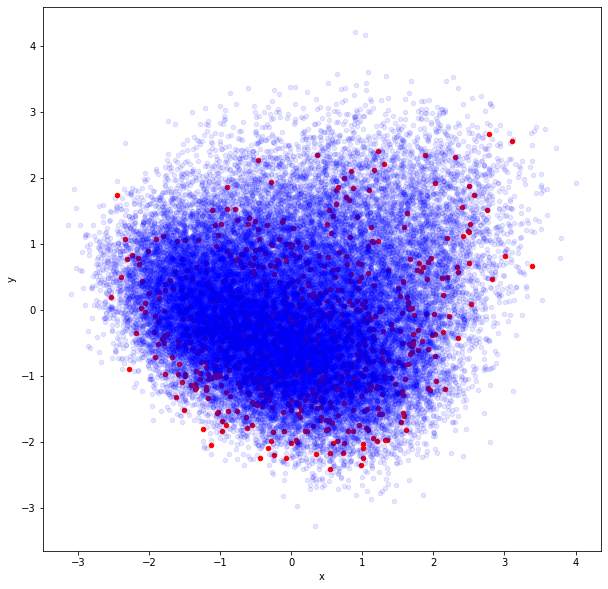

In [28]:
# Color by box office bomb
fig = plt.figure(figsize=(10, 10))
plots_df[plots_df["is_bomb_tvtropes"]].plot.scatter(x="x", y="y", color="red", ax=fig.gca())
plots_df[~plots_df["is_bomb_tvtropes"]].plot.scatter(x="x", y="y", color="blue", ax=fig.gca(), alpha=0.1)

plt.show()


In [10]:
# SVM on the plot embeddings
keys = []
embeddings = []
for key, embedding in plot_embeddings_mapping.items():
    keys.append(key)
    embeddings.append(embedding)

embeddings = np.array(embeddings).astype(np.float32)
embeddings = embeddings - np.mean(embeddings)
embeddings = embeddings / np.std(embeddings)
keys = np.array(keys).astype(np.int32)
dict_targets = plots_df[["wiki_id", "is_bomb_tvtropes"]].set_index("wiki_id")["is_bomb_tvtropes"].to_dict()
targets = []
for key in keys:
    if key in dict_targets:
        targets.append(dict_targets[key])
    else:
        targets.append(False)

targets = np.array(targets).astype(np.float32)
print(targets.shape)

svm = SVR(verbose=True, max_iter=20000)
svm.fit(embeddings, targets)


(42303,)
[LibSVM]..............*.....

In [7]:
svm.score(embeddings, targets)


-6.656012207417039

### Let's only study the Drama genre

In [31]:
plots_df = plots_df.merge(movies_df[["wiki_id", "genres"]], on="wiki_id", how="inner")


In [32]:
plots_df["genres"] = plots_df["genres"].apply(lambda x: json.loads(x))
plots_df["genres"] = plots_df["genres"].apply(lambda x: list(x.values()))
display(plots_df.head())


,wiki_id,plot,name,is_bomb_tvtropes,x,y,genres
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,False,-0.830982,1.390214,"[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,False,0.163450,0.081299,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,False,0.039579,0.234242,"[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,False,-0.713151,-1.727510,"[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,False,0.398781,-0.591407,"[Crime Fiction, Drama, Docudrama, World cinema..."


In [33]:
plots_df["is_drama"] = plots_df["genres"].apply(lambda x: "Drama" in x)
display(plots_df.head())


,wiki_id,plot,name,is_bomb_tvtropes,x,y,genres,is_drama
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,False,-0.830982,1.390214,"[Drama, World cinema]",True
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,False,0.163450,0.081299,"[Action/Adventure, Science Fiction, Action, Dr...",True
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,False,0.039579,0.234242,"[Musical, Action, Drama, Bollywood]",True
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,False,-0.713151,-1.727510,"[Screwball comedy, Comedy]",False
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,False,0.398781,-0.591407,"[Crime Fiction, Drama, Docudrama, World cinema...",True


<AxesSubplot:xlabel='x', ylabel='y'>

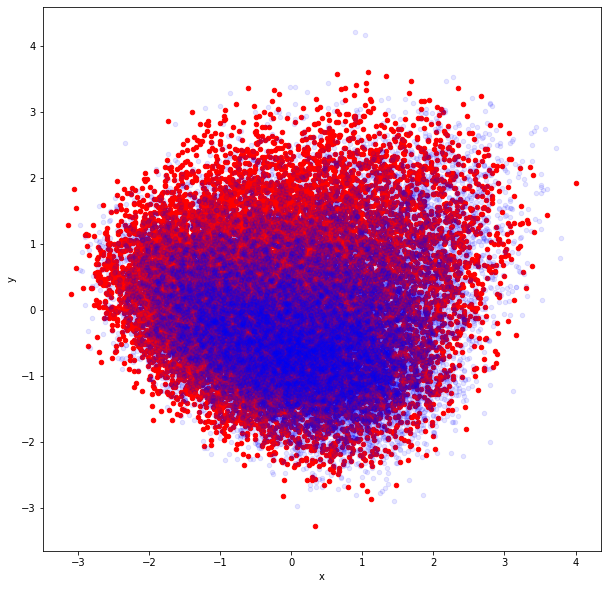

In [36]:
# Color by Drama
fig = plt.figure(figsize=(10, 10))
plots_df[plots_df["is_drama"]].plot.scatter(x="x", y="y", color="red", ax=fig.gca())
plots_df[~plots_df["is_drama"]].plot.scatter(x="x", y="y", color="blue", alpha=0.1, ax=fig.gca())


In [2]:
n = 25
# Get a 2D representation of the plot embeddings
plots_df_drama = plots_df[plots_df["is_drama"]]
print(len(plots_df_drama))

plot_embeddings_mapping_drama = dict()
for k, v in plot_embeddings_mapping.items():
    if k in plots_df_drama["wiki_id"].values:
        plot_embeddings_mapping_drama[k] = v

pca = PCA(n_components=n)
pca.fit(list(plot_embeddings_mapping_drama.values()))
print("Explained variance ratio", sum(pca.explained_variance_ratio_))

for i in range(n):
    plots_df_drama["x_" + str(i)] = plots_df["wiki_id"].apply(lambda x: pca.transform([plot_embeddings_mapping[x]])[0][i] if x in plot_embeddings_mapping else 0)


NameError: name 'plots_df' is not defined

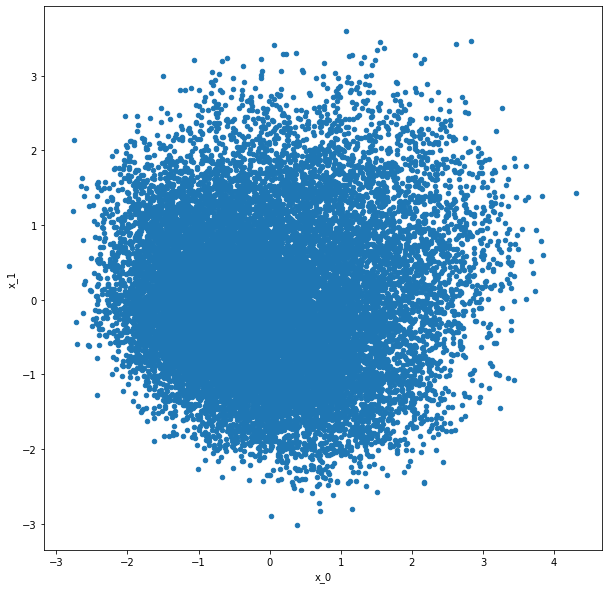

In [8]:
plots_df_drama.plot.scatter(x="x_0", y="x_1", figsize=(10, 10))
plt.show()


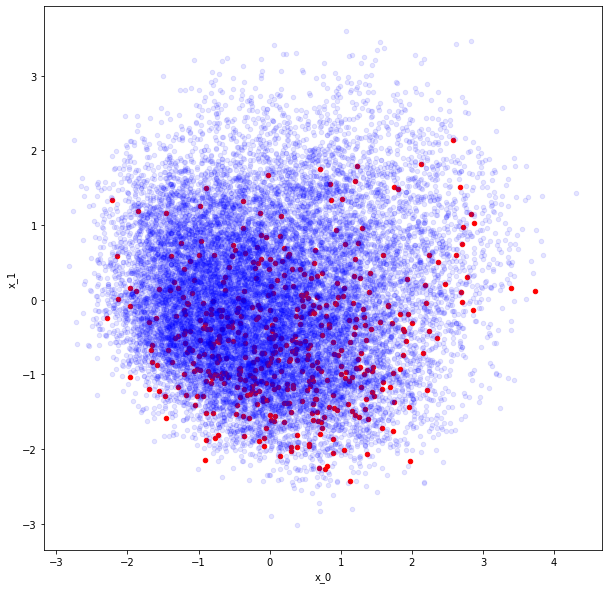

In [9]:
fig = plt.figure(figsize=(10, 10))
plots_df_drama[plots_df_drama["is_bomb_tvtropes"]].plot.scatter(x="x_0", y="x_1", color="red", ax=fig.gca())
plots_df_drama[~plots_df_drama["is_bomb_tvtropes"]].plot.scatter(x="x_0", y="x_1", color="blue", alpha=0.1, ax=fig.gca())
plt.show()


In [10]:
# SVM classifier
x = plots_df_drama[["x_" + str(i) for i in range(n)]]


18320


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       is_bomb_tvtropes   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              8.228
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    3.84e-30
Time:                        10:53:48   Log-Likelihood:                          8120.3
No. Observations:               18320   AIC:                                 -1.619e+04
Df Residuals:                   18295   BIC:                                 -1.600e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_0            0.0036      0.001      3.570      0.000       0.002       0.006
x_1           -0.0121      0.001    -10.656      0.000      -0.014      -0.010
x_2           -0.0056      0.001     -4.808      0.000      -0.008      -0.003
x_3            0.0034      0.001      2.666      0.008       0.001       0.006
x_4            0.0030      0.001      2.212      0.027       0.000       0.006
x_5           -0.0024      0.001     -1.760      0.078      -0.005       0.000
x_6            0.0005      0.001      0.317      0.751      -0.002       0.003
x_7           -0.0016      0.001     -1.089      0.276      -0.004       0.001
x_8           -0.0033      0.001     -2.182      0.029      -0.006      -0.000
x_9            0.0021      0.002      1.348      0.178      -0.001       0.005
x_10           0.0040      0.002      2.491      0.013       0.001       0.007
x_11          -0.0045      0.002     -2.798      0.005      -0.008      -0.001
x_12           0.0030      0.002      1.780      0.075      -0.000       0.006
x_13          -0.0031      0.002     -1.834      0.067      -0.006       0.000
x_14           0.0002      0.002      0.112      0.911      -0.003       0.004
x_15          -0.0021      0.002     -1.232      0.218      -0.006       0.001
x_16          -0.0027      0.002     -1.506      0.132      -0.006       0.001
x_17           0.0012      0.002      0.655      0.513      -0.002       0.005
x_18           0.0010      0.002      0.525      0.600      -0.003       0.005
x_19          -0.0036      0.002     -1.898      0.058      -0.007       0.000
x_20           0.0006      0.002      0.322      0.747      -0.003       0.004
x_21          -0.0005      0.002     -0.247      0.805      -0.004       0.003
x_22           0.0035      0.002      1.815      0.070      -0.000       0.007
x_23           0.0002      0.002      0.106      0.916      -0.004       0.004
x_24           0.0022      0.002      1.083      0.279      -0.002       0.006
==============================================================================
Omnibus:                    20357.669   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1055777.560
Skew:                           6.058   Prob(JB):                         0.00
Kurtosis:                      38.161   Cond. No.                         1.98
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from tqdm import tqdm
# Compute the crowding distance between the plot embeddings
wiki_ids = list(plot_embeddings_mapping.keys())
embeddings = np.array(list(plot_embeddings_mapping.values()))

crowding_distance = np.zeros(len(embeddings))
for i in tqdm(range(len(embeddings))):
    distances = np.linalg.norm(embeddings - embeddings[i], axis=1)
    distances[i] = np.inf
    crowding_distance[i] = np.min(distances)


NameError: name 'plot_embeddings_mapping' is not defined

### SVM to detect bombs

## Analysis of plot by counting words

In [8]:
plots_df


,wiki_id,plot,name,is_bomb_tvtropes
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,False
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,False
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,False
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,False
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,False
...,...,...,...,...
39581,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,False
39582,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,False
39583,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,False
39584,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,False
